# Capstone 3: Life Expectancy prediction by country
## Springboard Data Science Career Track
### Capstone Project 3
### Data Wrangling and EDA

#### Problem Statement: Assessing the relation of the predictive factors and the different predictive factors that affect the life expectancy of an individual in the 193 countries.

#### Dataset: Global Health Repository within the World Health Organization

In [1]:
#import libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 999)
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pycountry
import plotly.express as px
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.shape

(2938, 22)

**Checking for missing values**

We will check the total missing values for each of the features.

In [5]:
missing = pd.concat([df.isnull().sum(), 100*df.isnull().mean()], axis = 1)
missing.columns = ['count', '%']
missing.sort_values(by = ['count','%'], ascending = True)

,count,%
Country,0,0.000000
Year,0,0.000000
Status,0,0.000000
infant deaths,0,0.000000
percentage expenditure,0,0.000000
Measles,0,0.000000
under-five deaths,0,0.000000
HIV/AIDS,0,0.000000
Life expectancy,10,0.340368
Adult Mortality,10,0.340368


The population column and the Hepatitis B column have the maximum missing data. We can impute the columns with either the mean values or the median values or with previous datapoints. We will not use the mean values as this might skew the results especially with population data not being normalized.



In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median',fill_value=None)
df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [7]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000



#### EDA

In [11]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

**Life Expectancy Evolution**

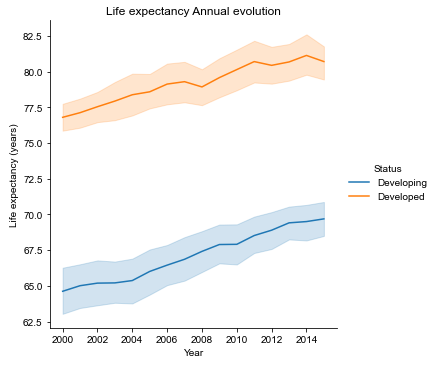

In [41]:
sns.relplot(x="Year", y='Life expectancy ', kind="line", hue="Status",data=df)
plt.title("Life expectancy Annual evolution", fontsize=12)
sns.set_style("white")
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.show()

It is evident from the above plot that irrespective of the status life expectancy has had a positive trend over the years. Developed countries have also had more years of life expectancy throughout the 15 years.


**Distribution of Life Expectancy for Developed and Developing Countries**

<AxesSubplot:xlabel='Life expectancy ', ylabel='Count'>

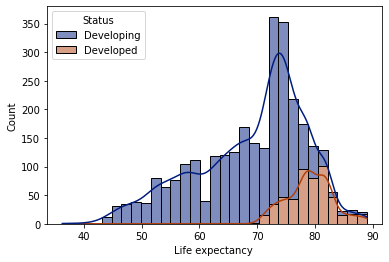

In [12]:
sns.histplot(data=df, x = df["Life expectancy "],hue='Status',multiple='stack',kde=True,palette='dark')

**Life Expectancy based on Status**

In [13]:
fig=px.violin(df,x='Status',y='Life expectancy ',color = 'Status', template='plotly_white',box=True,title='Life expectancy Based on Countries status')
fig.show()

**Building Chloropleth maps for Life Expectancy based on countries**

In [16]:
df1 = pd.read_csv("Life Expectancy Data.csv")
list_countries = df1['Country'].unique().tolist()
d_country_code = {} 
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        d_country_code.update({country: ' '})

for k, v in d_country_code.items():
    df1.loc[(df1.Country == k), 'iso_alpha'] = v

fig = px.choropleth(data_frame = df1,
                    title = "Life Expectancy over the years",
                    locations= "iso_alpha",
                    color= "Life expectancy ",  
                    hover_name= "Country",
                    color_continuous_scale= px.colors.sequential.Plasma, 
                    animation_frame= "Year")

fig.show()
fig.write_html("Chloropleth1.html")


could not add ISO 3 code for -> Bolivia (Plurinational State of)
could not add ISO 3 code for -> Democratic Republic of the Congo
could not add ISO 3 code for -> Iran (Islamic Republic of)
could not add ISO 3 code for -> Micronesia (Federated States of)
could not add ISO 3 code for -> Swaziland
could not add ISO 3 code for -> The former Yugoslav republic of Macedonia
could not add ISO 3 code for -> Venezuela (Bolivarian Republic of)


**Chloropleth map of GDP of different countries**

In [17]:
df1 = pd.read_csv("Life Expectancy Data.csv")
list_countries = df1['Country'].unique().tolist()
d_country_code = {} 
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        d_country_code.update({country: ' '})

for k, v in d_country_code.items():
    df1.loc[(df1.Country == k), 'iso_alpha'] = v

fig = px.choropleth(data_frame = df1,
                    title = "GDP over the years",
                    locations= "iso_alpha",
                    color= "GDP",  
                    hover_name= "Country",
                    color_continuous_scale= px.colors.sequential.Plasma, 
                    animation_frame= "Year")

fig.show()
fig.write_html("Chloropleth2.html")

could not add ISO 3 code for -> Bolivia (Plurinational State of)
could not add ISO 3 code for -> Democratic Republic of the Congo
could not add ISO 3 code for -> Iran (Islamic Republic of)
could not add ISO 3 code for -> Micronesia (Federated States of)
could not add ISO 3 code for -> Swaziland
could not add ISO 3 code for -> The former Yugoslav republic of Macedonia
could not add ISO 3 code for -> Venezuela (Bolivarian Republic of)


**Correlation between different variables**

In [9]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Life expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentage expenditure,0.031400,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,-0.087852,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
Hepatitis B,0.021302,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,-0.170549,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
Measles,-0.082493,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,0.507809,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
BMI,0.108484,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,-0.237048,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806
under-five deaths,-0.042937,-0.222738,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237048,1.000000,-0.188864,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242


**Correlation Heatmap**

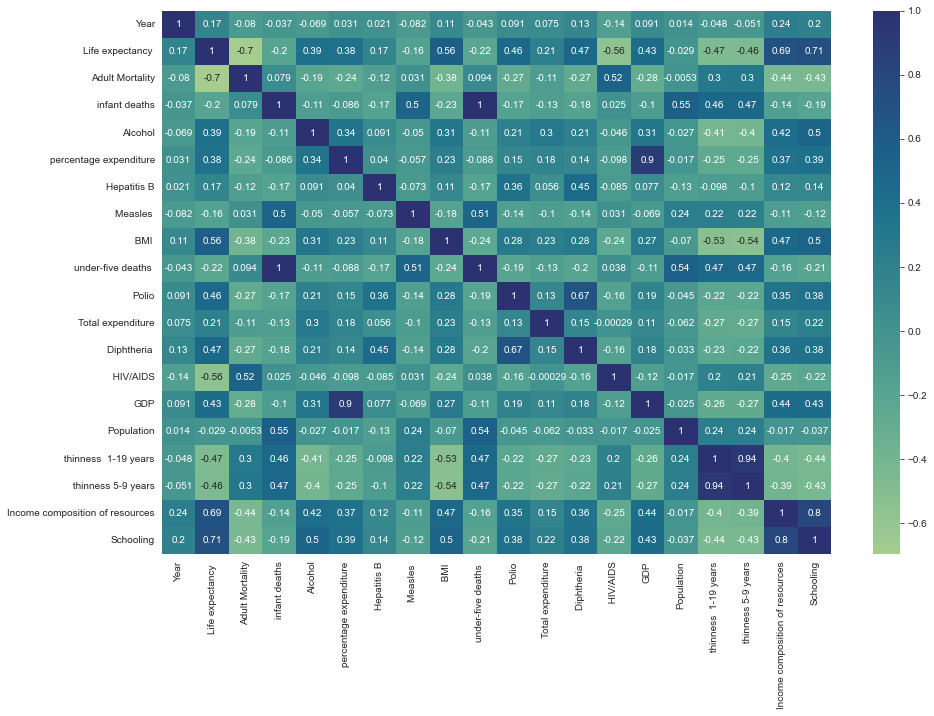

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap = "crest")
plt.show()

From the correlation heatmap, the following features have strong to moderate correlations with life expectancy:
1. Positive correlations: Schooling (0.71), Income composition of resources (0.69),GDP(0.43)
2. Negative correlations: Adult Mortality (-0.70), HIV/AIDS(-0.56)

**Life Expectancy vs Adult Mortality**

<Figure size 1080x720 with 0 Axes>

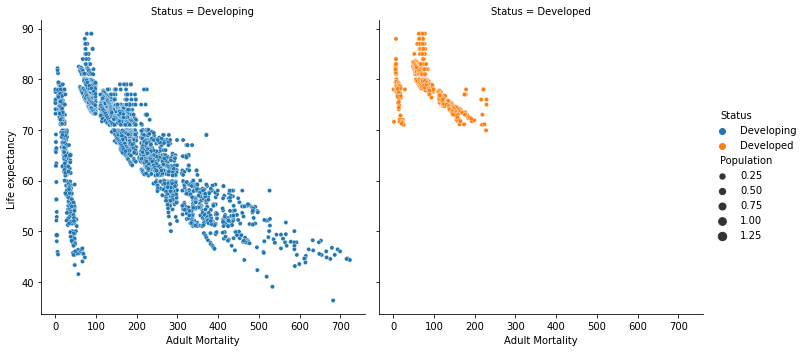

In [19]:
plt.figure(figsize=(15,10))
sns.relplot(data=df,x= df['Adult Mortality'],y=df['Life expectancy '],hue=df['Status'],size=df['Population'],col=df['Status'],kind='scatter')
plt.show()

In [30]:
px.scatter(df,y='Adult Mortality',x='Life expectancy ',color='Country',size='Adult Mortality',template='plotly_white',opacity=0.4,title='<b> Life Expectancy Versus Adult Mortality',width=800,height=400)

**Life Expectancy vs Infant deaths**

<Figure size 1080x720 with 0 Axes>

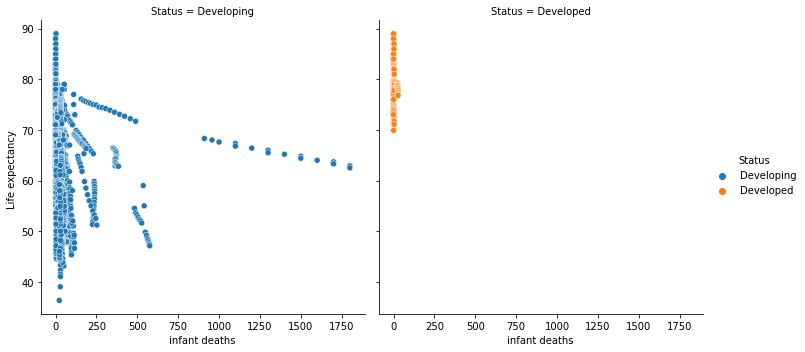

In [35]:
plt.figure(figsize=(15,10))
sns.relplot(data=df,x= df['infant deaths'],y=df['Life expectancy '],hue=df['Status'],col=df['Status'],kind='scatter')
plt.show()

In [33]:
px.scatter(df.sort_values(by='Year'),y='infant deaths',x='Life expectancy ',template='plotly_white',size='infant deaths',color='Country',opacity=0.6,title='<b>Life Expectancy Versus Infant Deaths of Countries in every Year')

**Life Expectancy vs Schooling**

<Figure size 1080x720 with 0 Axes>

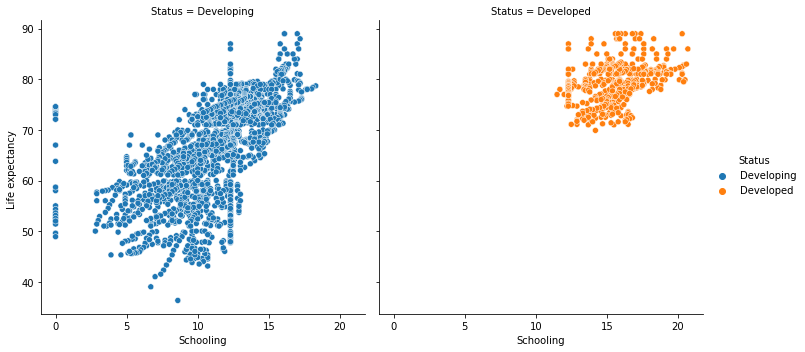

In [39]:
plt.figure(figsize=(15,10))
sns.relplot(data=df,x= df['Schooling'],y=df['Life expectancy '],hue=df['Status'],col=df['Status'],kind='scatter')
plt.show()

**Life Expectancy vs GDP**

<Figure size 1080x720 with 0 Axes>

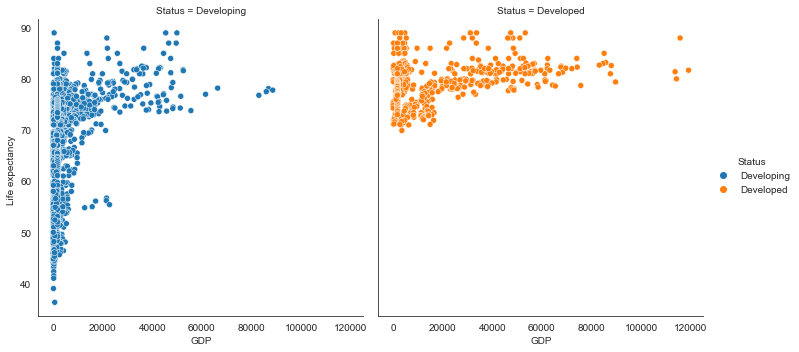

In [45]:
plt.figure(figsize=(15,10))
sns.relplot(data=df,x= df['GDP'],y=df['Life expectancy '],hue=df['Status'],col=df['Status'],kind='scatter')
plt.show()

**Life Expectancy vs GDP composition**

<Figure size 1080x720 with 0 Axes>

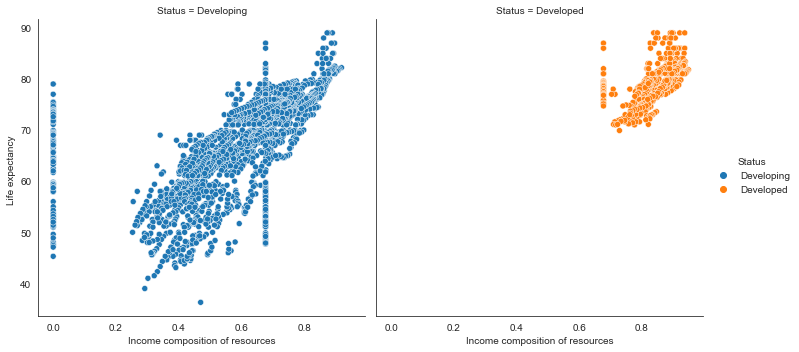

In [46]:
plt.figure(figsize=(15,10))
sns.relplot(data=df,x= df['Income composition of resources'],y=df['Life expectancy '],hue=df['Status'],col=df['Status'],kind='scatter')
plt.show()


**Life Expectancy vs Total Expenditure in developing and developed countries**


<Figure size 1080x720 with 0 Axes>

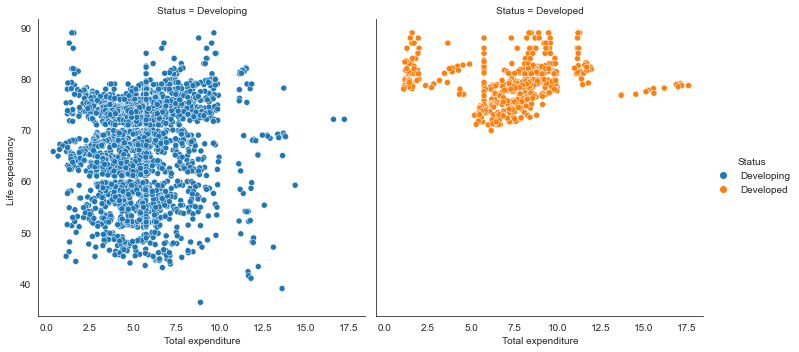

In [47]:
plt.figure(figsize=(15,10))
sns.relplot(data=df,x= df['Total expenditure'],y=df['Life expectancy '],hue=df['Status'],col=df['Status'],kind='scatter')
plt.show()

**Life Expectancy vs ALcohol consumption**

<Figure size 1080x720 with 0 Axes>

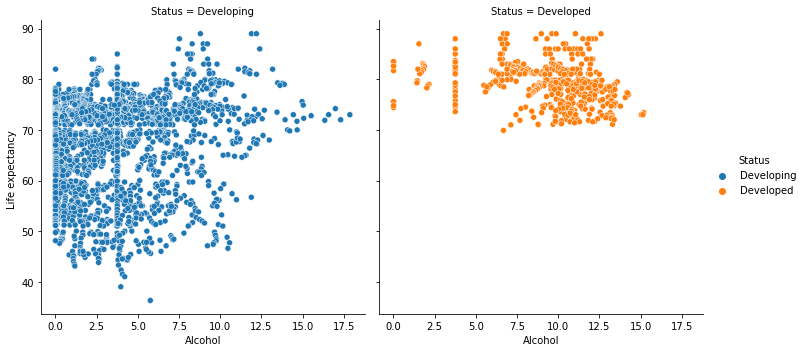

In [38]:
plt.figure(figsize=(15,10))
sns.relplot(data=df,x= df['Alcohol'],y=df['Life expectancy '],hue=df['Status'],col=df['Status'],kind='scatter')
plt.show()